<a href="https://colab.research.google.com/github/Peksyaji/Data_Mining_and_BI/blob/main/Clustering_Produksi_Pertanian_Bojonegoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/Data jadi.csv', sep=';')
df.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan
4,Dander,73889,150,5430,70181,113,1200,70415.90,72,1200,60262.20,187.57,5430
8,Kanor,42811,84,6028,40559,67,6401,81974.00,118,6401,48378.04,203.79,6028
17,Ngasem,64141,122,2979,49849,92,1007,61032.15,112,1007,37494.82,404.70,2979
16,Ngambon,15166,123,578,5421,39,3057,23332.38,108,3057,34483.73,1393.29,578
2,Bojonegoro,0,0,1002,0,0,3302,17854.00,92,3302,10079.81,51.92,1002


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kecamatan           28 non-null     object 
 1   2017_produksi       28 non-null     int64  
 2   2017_produktivitas  28 non-null     int64  
 3   2017_lahan          28 non-null     int64  
 4   2018_produksi       28 non-null     int64  
 5   2018_produktivitas  28 non-null     int64  
 6   2018_lahan          28 non-null     int64  
 7   2019_produksi       28 non-null     float64
 8   2019_produktivitas  28 non-null     int64  
 9   2019_lahan          28 non-null     int64  
 10  2020_produksi       28 non-null     float64
 11  2020_produktivitas  28 non-null     float64
 12  2020_lahan          28 non-null     int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 3.0+ KB


# Preprocessing

In [4]:
df1 = df.iloc[:,1:]
label = df.iloc[:,0]

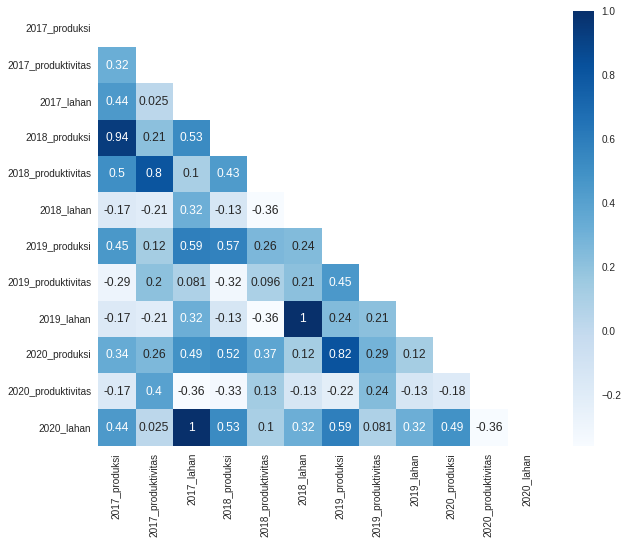

In [5]:
# Cek korelasi
corr = df1.corr()
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

Dari visualiasi korelasi di atas, terlihat bahwa terdapat beberapa korelasi yang kuat antar variabel. Oleh karena itu, data dapat direduksi dengan PCA untuk menyederhanakan dimensinya.

Plot distribusi dari: 2017_produksi


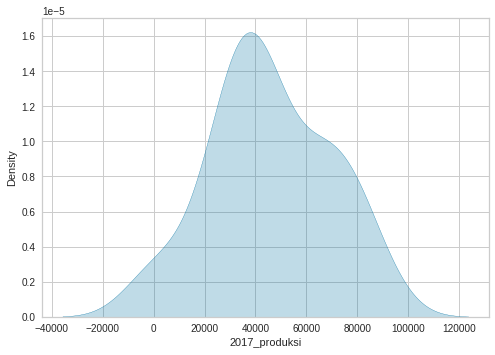

Plot distribusi dari: 2017_produktivitas


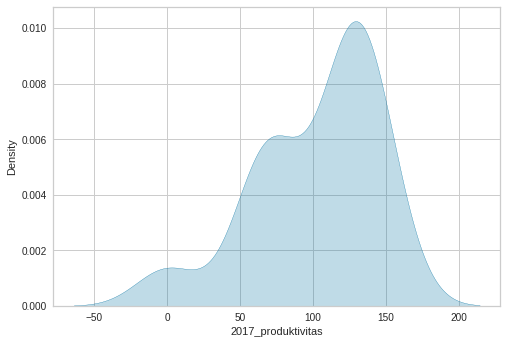

Plot distribusi dari: 2017_lahan


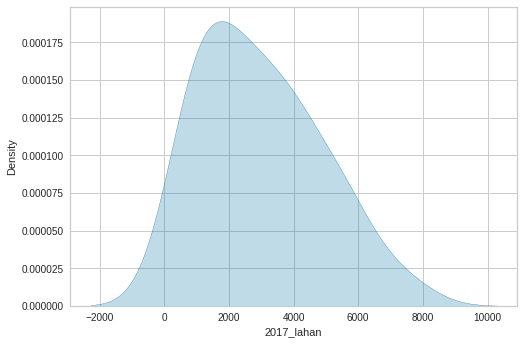

Plot distribusi dari: 2018_produksi


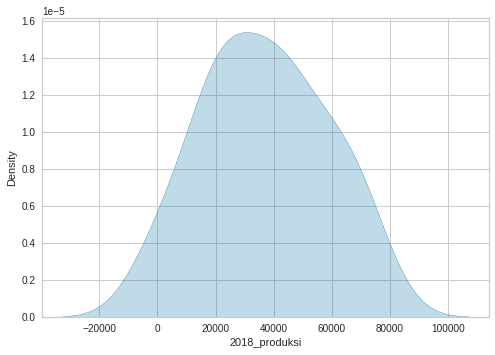

Plot distribusi dari: 2018_produktivitas


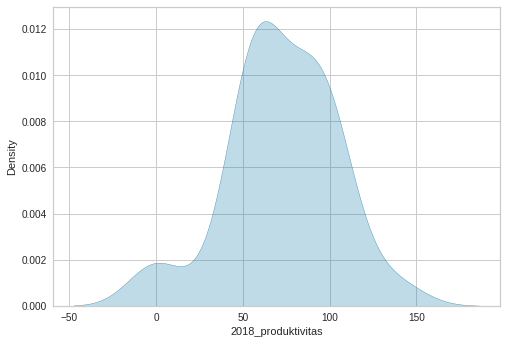

Plot distribusi dari: 2018_lahan


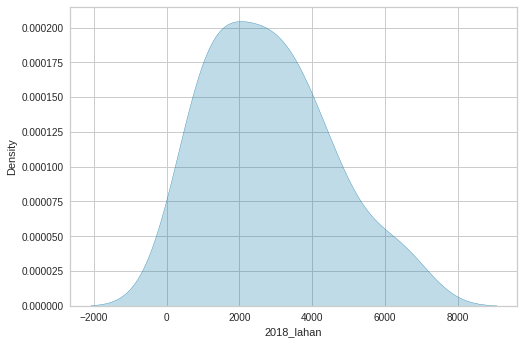

Plot distribusi dari: 2019_produksi


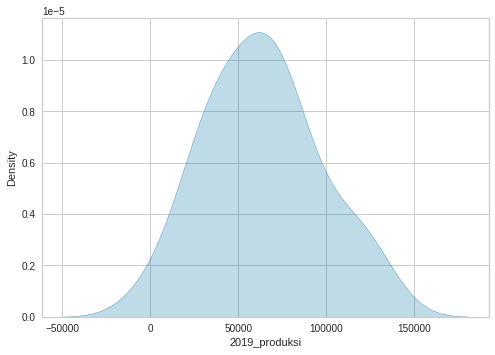

Plot distribusi dari: 2019_produktivitas


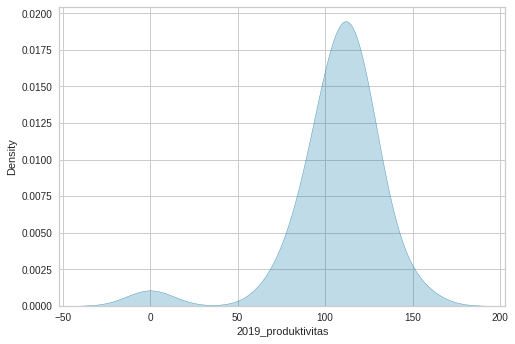

Plot distribusi dari: 2019_lahan


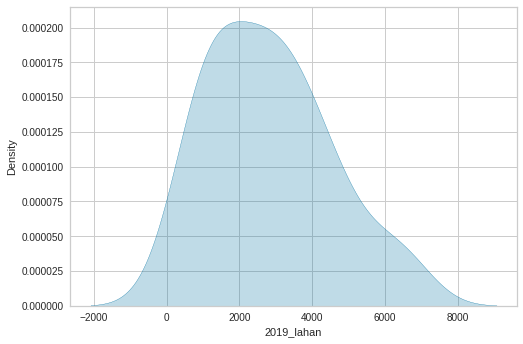

Plot distribusi dari: 2020_produksi


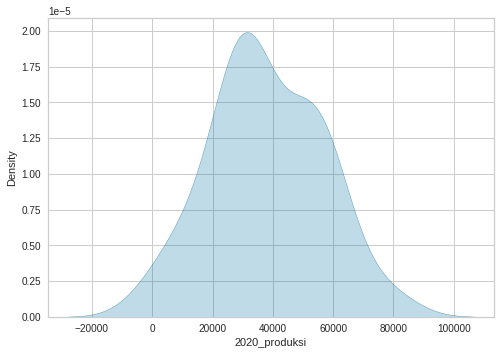

Plot distribusi dari: 2020_produktivitas


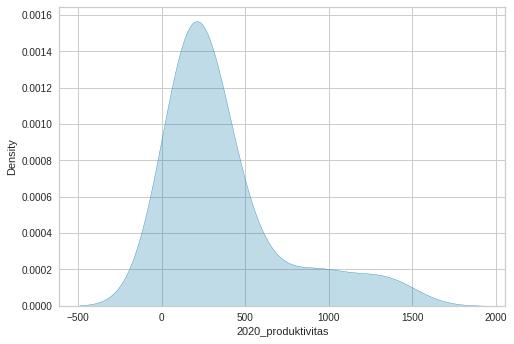

Plot distribusi dari: 2020_lahan


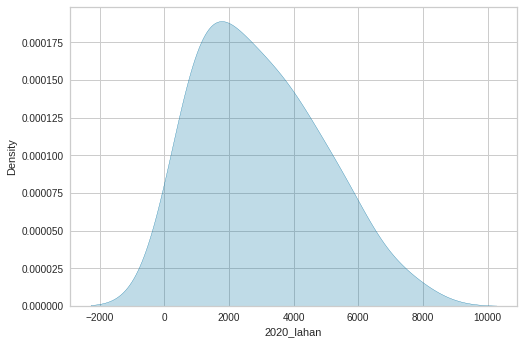

In [6]:
# Cek distribusi data
kolom = df1.columns

for i, var in enumerate(kolom):
    print('Plot distribusi dari:', var)
    sns.kdeplot(df1[var], shade=True, color="b")
    plt.show()

Terlihat bahwa data memiliki distribusi yang mendekati distribusi normal dengan skew yang berbeda-beda.

## Standarisasi
Karena variabel tersebar di unit yang berbeda, maka perlu melakukan StandardScaler karena KMeans menggunakan pengukuran berbasis jarak untuk menentukan kemiripan antar titik data. Jika kita tidak melakukan standarisasi, maka hasil cluster kita tidak akan valid. Outlier akan digunakan untuk membentuk cluster uniknya.

In [7]:
# Standarisasi
scaler = StandardScaler()
scaler.fit(df1)
df_standar = scaler.transform(df1)
df_standar = pd.DataFrame(df_standar, columns=df1.columns)
df_standar.head()

,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan
0,0.748624,-0.615551,0.578688,0.722558,-0.302813,-1.043429,0.668700,-0.175996,-1.043429,0.643804,-0.500641,0.578688
1,-0.172360,0.460135,0.677535,0.351657,-0.600894,0.129049,0.804350,0.832865,0.129049,0.734971,-0.751505,0.677535
2,-1.996517,-2.498002,-1.081397,-1.767041,-2.389383,0.292989,-1.436368,-0.564020,0.292989,-1.552086,-0.922006,-1.081397
3,-0.355620,0.729057,-1.262067,-0.651600,0.889513,-1.259587,-0.951737,-0.874439,-1.259587,-0.535077,0.190705,-1.262067
4,1.236749,1.169110,1.350245,1.604744,1.353195,-0.983317,0.216402,-1.340067,-0.983317,1.251604,-0.530860,1.350245


Plot distribusi dari: 2017_produksi


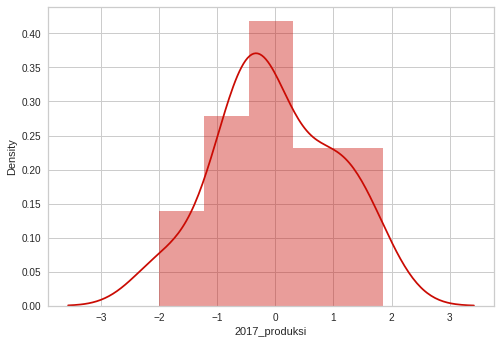

Plot distribusi dari: 2017_produktivitas


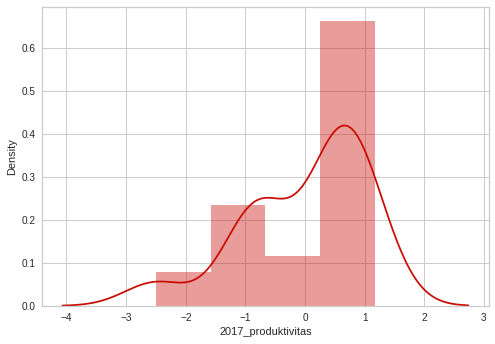

Plot distribusi dari: 2017_lahan


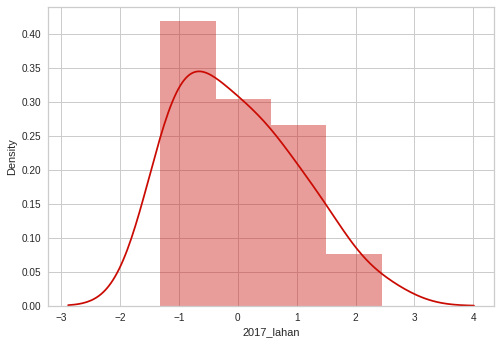

Plot distribusi dari: 2018_produksi


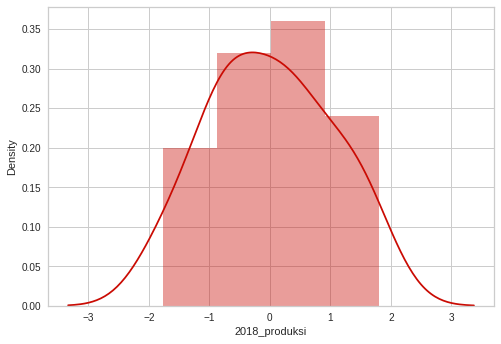

Plot distribusi dari: 2018_produktivitas


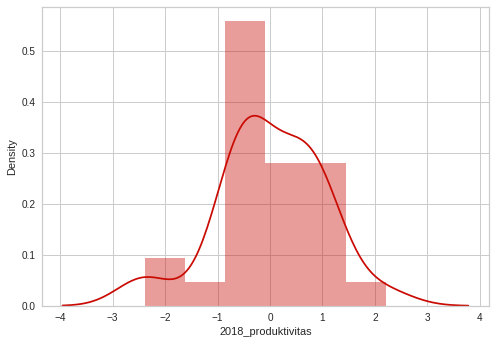

Plot distribusi dari: 2018_lahan


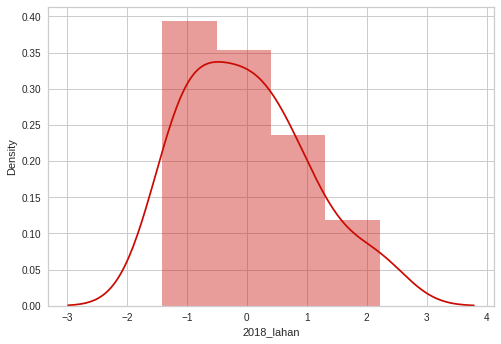

Plot distribusi dari: 2019_produksi


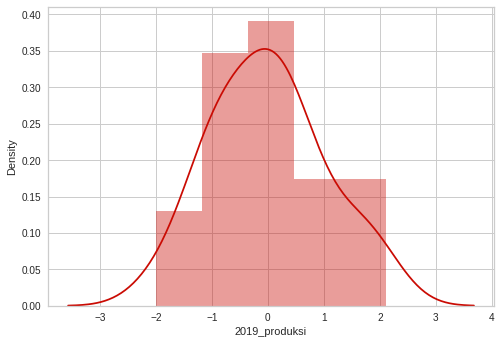

Plot distribusi dari: 2019_produktivitas


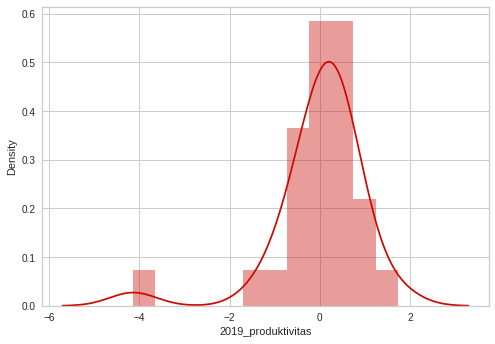

Plot distribusi dari: 2019_lahan


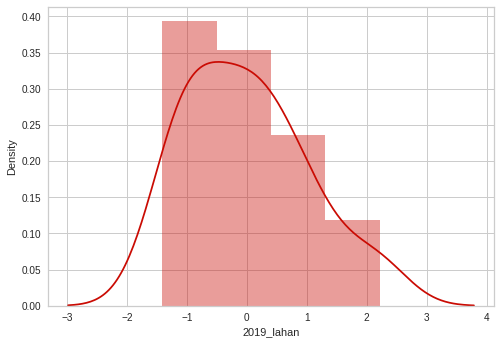

Plot distribusi dari: 2020_produksi


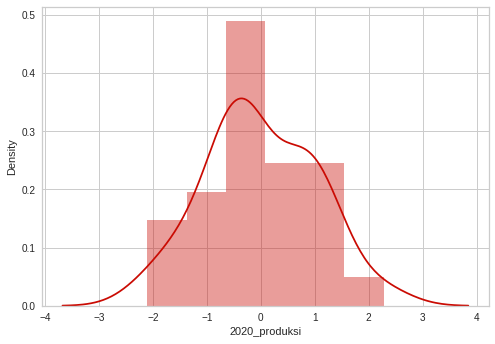

Plot distribusi dari: 2020_produktivitas


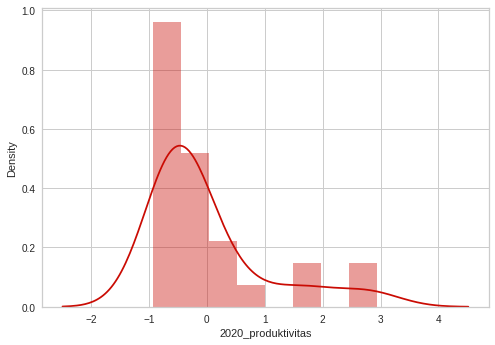

Plot distribusi dari: 2020_lahan


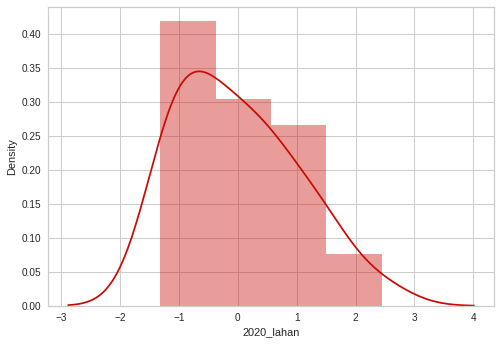

In [8]:
# Plot distribusi setelah stadarisasi
for i, var in enumerate(df_standar):
    print('Plot distribusi dari:', var)
    sns.distplot(df_standar[var], color="r")
    plt.show()

# PCA

In [9]:
pca = PCA()
df_pca = pca.fit_transform(df_standar)
plot = pd.DataFrame(pca.explained_variance_ratio_)
value = plot
value

,0
0,3.593782e-01
1,2.457038e-01
2,1.606368e-01
3,8.256929e-02
4,5.810981e-02
5,4.692313e-02
6,2.974014e-02
7,1.054545e-02
8,4.722863e-03
9,1.670587e-03


Dari output rasio variansi penjelas di atas, saya memilih banyaknya komponen yang akan digunakan adalah 2, 3, dan 4.

In [10]:
# PCA dengan 2 komponen
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_standar)
df_pca_2 = pd.DataFrame(df_pca_2)

df_pca_2.columns = ['PC1', 'PC2']
df_pca_2 = df_pca_2.assign(Kecamatan=label)
df_pca_2 = df_pca_2.set_index('Kecamatan')
df_pca_2

,PC1,PC2
Kecamatan,,
Balen,1.252577,-0.712392
Baureno,1.341453,0.723773
Bojonegoro,-4.040197,2.598566
Bubulan,-1.997011,-2.314616
Dander,2.960897,-2.179251
Gayam,-1.746817,-1.950408
Gondang,-0.224842,-1.450458
Kalitidu,0.718759,-0.134144
Kanor,2.232863,3.144945


In [11]:
# PCA dengan 3 komponen
pca = PCA(n_components=3)
df_pca_3 = pca.fit_transform(df_standar)
df_pca_3 = pd.DataFrame(df_pca_3)

df_pca_3.columns = ['PC1', 'PC2', 'PC3']
df_pca_3 = df_pca_3.assign(Kecamatan=label)
df_pca_3 = df_pca_3.set_index('Kecamatan')
df_pca_3

,PC1,PC2,PC3
Kecamatan,,,
Balen,1.252577,-0.712392,1.113560
Baureno,1.341453,0.723773,-0.394846
Bojonegoro,-4.040197,2.598566,1.764677
Bubulan,-1.997011,-2.314616,0.131341
Dander,2.960897,-2.179251,1.098644
Gayam,-1.746817,-1.950408,-1.828480
Gondang,-0.224842,-1.450458,-0.740651
Kalitidu,0.718759,-0.134144,-0.161145
Kanor,2.232863,3.144945,-0.399374


In [12]:
# PCA dengan 4 komponen
pca = PCA(n_components=4)
df_pca_4 = pca.fit_transform(df_standar)
df_pca_4 = pd.DataFrame(df_pca_4)

df_pca_4.columns = ['PC1', 'PC2', 'PC3', 'PC4']
df_pca_4 = df_pca_4.assign(Kecamatan=label)
df_pca_4 = df_pca_4.set_index('Kecamatan')
df_pca_4

,PC1,PC2,PC3,PC4
Kecamatan,,,,
Balen,1.252577,-0.712392,1.113560,-1.306340
Baureno,1.341453,0.723773,-0.394846,-0.809204
Bojonegoro,-4.040197,2.598566,1.764677,-0.992054
Bubulan,-1.997011,-2.314616,0.131341,0.019774
Dander,2.960897,-2.179251,1.098644,0.335807
Gayam,-1.746817,-1.950408,-1.828480,-0.549607
Gondang,-0.224842,-1.450458,-0.740651,-1.276586
Kalitidu,0.718759,-0.134144,-0.161145,-1.514429
Kanor,2.232863,3.144945,-0.399374,0.971069


# Clustering

## Mencari k optimal

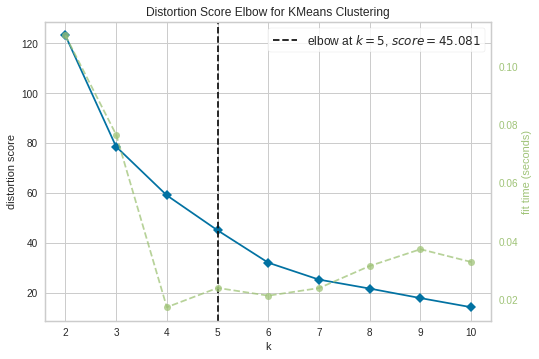

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Digunakan Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42))
Elbow_fast.fit(df_pca_2) # Untuk PCA 2 komponen
Elbow_fast.show()

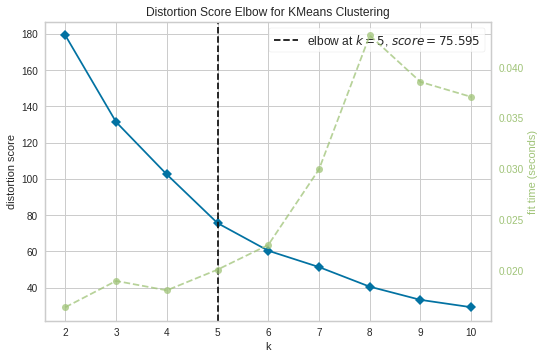

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Digunakan Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42))
Elbow_fast.fit(df_pca_3) # Untuk PCA 3 komponen
Elbow_fast.show()

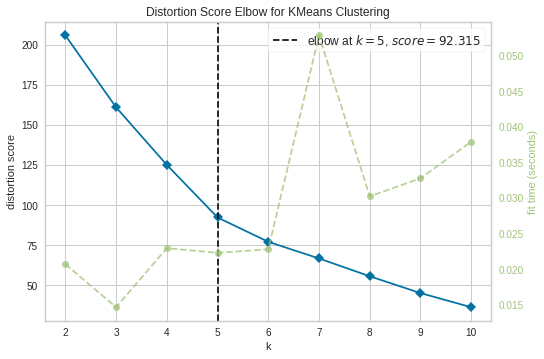

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Digunakan Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42))
Elbow_fast.fit(df_pca_4) # Untuk PCA 4 komponen
Elbow_fast.show()

Terlihat dari kedua output di atas bahwa nilai optimal k adalah 5, tetapi nilai k yang saya gunakan adalah 4, 5, dan 6.

## KMeans Clustering

In [16]:
# Fit
kmeans_standar_4 = KMeans(n_clusters=4, init='k-means++', max_iter=10)
kmeans_standar_4.fit(df_standar)  # Tanpa PCA

# Predict
pred_standar_4 = kmeans_standar_4.predict(df_standar)

df['Cluster'] = pred_standar_4

clus_standar_4 = df
clus_standar_4.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
10,Kasiman,0,0,2927,0,0,4448,40894.42,110,4448,31444.65,137.03,2927,1
7,Kalitidu,55508,67,887,57565,64,2706,119405.00,116,2706,62777.75,295.02,887,0
8,Kanor,42811,84,6028,40559,67,6401,81974.00,118,6401,48378.04,203.79,6028,0
25,Tambakrejo,69913,138,4352,44042,99,1778,75061.83,126,1778,28498.16,670.20,4352,0
22,Sugihwaras,32841,67,3791,24592,56,2429,47905.48,104,2429,25078.37,162.80,3791,1


In [17]:
# Fit
kmeans_standar_5 = KMeans(n_clusters=5, init='k-means++', max_iter=10)
kmeans_standar_5.fit(df_standar)  # Tanpa PCA

# Predict
pred_standar_5 = kmeans_standar_5.predict(df_standar)

df['Cluster'] = pred_standar_5

clus_standar_5 = df
clus_standar_5.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
6,Gondang,35235,114,1316,38129,101,1406,65452.04,118,1406,60195.82,267.17,1316,1
19,Padangan,28013,68,2093,20595,55,3885,36464.00,98,3885,21595.22,220.79,2093,1
2,Bojonegoro,0,0,1002,0,0,3302,17854.00,92,3302,10079.81,51.92,1002,2
23,Sukosewu,46364,65,3351,34354,59,2477,58886.00,118,2477,35149.65,146.69,3351,1
4,Dander,73889,150,5430,70181,113,1200,70415.90,72,1200,60262.20,187.57,5430,0


In [18]:
# Fit
kmeans_standar_6 = KMeans(n_clusters=6, init='k-means++', max_iter=10)
kmeans_standar_6.fit(df_standar)  # Tanpa PCA

# Predict
pred_standar_6 = kmeans_standar_6.predict(df_standar)

df['Cluster'] = pred_standar_6

clus_standar_6 = df
clus_standar_6.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
1,Baureno,41687,121,4205,44099,54,3032,89114.00,128,3032,51015.14,111.05,4205,2
26,Temayang,38884,140,2308,29254,84,607,26432.00,98,607,18513.70,281.79,2308,1
11,Kedewan,87842,63,2402,74326,57,1428,0.00,0,1428,212.00,134.50,2402,5
14,Malo,43578,124,2380,24778,86,4411,48843.28,98,4411,31436.15,968.93,2380,1
10,Kasiman,0,0,2927,0,0,4448,40894.42,110,4448,31444.65,137.03,2927,3


In [19]:
# Fit
kmeans_pca_2_4 = KMeans(n_clusters=4, init='k-means++', max_iter=10)
kmeans_pca_2_4.fit(df_pca_2)  # Dengan 2 komponen

#predict
pred_pca_2_4 = kmeans_pca_2_4.predict(df_pca_2)

df['Cluster'] = pred_pca_2_4

clus_pca_2_4 = df
clus_pca_2_4.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
9,Kapas,30028,125,4264,18780,62,6476,75074.00,122,6476,32707.06,136.57,4264,2
1,Baureno,41687,121,4205,44099,54,3032,89114.00,128,3032,51015.14,111.05,4205,0
5,Gayam,25770,120,1885,19180,89,497,61150.33,124,497,32358.17,1266.49,1885,1
26,Temayang,38884,140,2308,29254,84,607,26432.00,98,607,18513.70,281.79,2308,1
14,Malo,43578,124,2380,24778,86,4411,48843.28,98,4411,31436.15,968.93,2380,1


In [20]:
# Fit
kmeans_pca_2_5 = KMeans(n_clusters=5, init='k-means++', max_iter=10)
kmeans_pca_2_5.fit(df_pca_2)  # Dengan 2 komponen

#predict
pred_pca_2_5 = kmeans_pca_2_5.predict(df_pca_2)

df['Cluster'] = pred_pca_2_5

clus_pca_2_5 = df
clus_pca_2_5.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
27,Trucuk,25598,124,1214,18026,88,2418,33432.74,114,2418,26081.35,214.84,1214,3
26,Temayang,38884,140,2308,29254,84,607,26432.00,98,607,18513.70,281.79,2308,3
23,Sukosewu,46364,65,3351,34354,59,2477,58886.00,118,2477,35149.65,146.69,3351,0
0,Balen,62734,77,4025,51819,63,1101,84800.00,102,1101,49383.37,198.05,4025,0
20,Purwosari,32216,133,1562,15742,56,3278,44020.55,151,3278,9851.52,933.31,1562,3


In [21]:
# Fit
kmeans_pca_2_6 = KMeans(n_clusters=6, init='k-means++', max_iter=10)
kmeans_pca_2_6.fit(df_pca_2)  # Dengan 2 komponen

#predict
pred_pca_2_6 = kmeans_pca_2_6.predict(df_pca_2)

df['Cluster'] = pred_pca_2_6

clus_pca_2_6 = df
clus_pca_2_6.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
7,Kalitidu,55508,67,887,57565,64,2706,119405.00,116,2706,62777.75,295.02,887,0
0,Balen,62734,77,4025,51819,63,1101,84800.00,102,1101,49383.37,198.05,4025,0
22,Sugihwaras,32841,67,3791,24592,56,2429,47905.48,104,2429,25078.37,162.80,3791,1
15,Margomulyo,40691,149,1082,37436,84,3523,66599.73,90,3523,54109.23,283.10,1082,0
24,Sumberrejo,77629,78,5274,63746,56,2012,117535.00,112,2012,56852.43,142.91,5274,5


In [22]:
# Fit
kmeans_pca_3_4 = KMeans(n_clusters=4, init='k-means++', max_iter=10)
kmeans_pca_3_4.fit(df_pca_3)  # Dengan 3 komponen

# Predict
pred_pca_3_4 = kmeans_pca_3_4.predict(df_pca_3)

df['Cluster'] = pred_pca_3_4

clus_pca_3_4 = df
clus_pca_3_4.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
26,Temayang,38884,140,2308,29254,84,607,26432.00,98,607,18513.70,281.79,2308,3
17,Ngasem,64141,122,2979,49849,92,1007,61032.15,112,1007,37494.82,404.70,2979,2
10,Kasiman,0,0,2927,0,0,4448,40894.42,110,4448,31444.65,137.03,2927,0
12,Kedungadem,74964,149,7418,67574,103,4691,108176.00,112,4691,78589.09,305.07,7418,1
16,Ngambon,15166,123,578,5421,39,3057,23332.38,108,3057,34483.73,1393.29,578,3


In [23]:
# Fit
kmeans_pca_3_5 = KMeans(n_clusters=5, init='k-means++', max_iter=10)
kmeans_pca_3_5.fit(df_pca_3)  # Dengan 3 komponen

# Predict
pred_pca_3_5 = kmeans_pca_3_5.predict(df_pca_3)

df['Cluster'] = pred_pca_3_5

clus_pca_3_5 = df
clus_pca_3_5.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
20,Purwosari,32216,133,1562,15742,56,3278,44020.55,151,3278,9851.52,933.31,1562,1
10,Kasiman,0,0,2927,0,0,4448,40894.42,110,4448,31444.65,137.03,2927,2
15,Margomulyo,40691,149,1082,37436,84,3523,66599.73,90,3523,54109.23,283.10,1082,1
12,Kedungadem,74964,149,7418,67574,103,4691,108176.00,112,4691,78589.09,305.07,7418,0
24,Sumberrejo,77629,78,5274,63746,56,2012,117535.00,112,2012,56852.43,142.91,5274,0


In [24]:
# Fit
kmeans_pca_3_6 = KMeans(n_clusters=6, init='k-means++', max_iter=10)
kmeans_pca_3_6.fit(df_pca_3)  # Dengan 3 komponen

# Predict
pred_pca_3_6 = kmeans_pca_3_6.predict(df_pca_3)

df['Cluster'] = pred_pca_3_6

clus_pca_3_6 = df
clus_pca_3_6.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
26,Temayang,38884,140,2308,29254,84,607,26432.00,98,607,18513.70,281.79,2308,5
10,Kasiman,0,0,2927,0,0,4448,40894.42,110,4448,31444.65,137.03,2927,1
8,Kanor,42811,84,6028,40559,67,6401,81974.00,118,6401,48378.04,203.79,6028,4
20,Purwosari,32216,133,1562,15742,56,3278,44020.55,151,3278,9851.52,933.31,1562,5
15,Margomulyo,40691,149,1082,37436,84,3523,66599.73,90,3523,54109.23,283.10,1082,0


In [25]:
# Fit
kmeans_pca_4_4 = KMeans(n_clusters=4, init='k-means++', max_iter=10)
kmeans_pca_4_4.fit(df_pca_4)  # Dengan 4 komponen

# Predict
pred_pca_4_4 = kmeans_pca_4_4.predict(df_pca_4)

df['Cluster'] = pred_pca_4_4

clus_pca_4_4 = df
clus_pca_4_4.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
12,Kedungadem,74964,149,7418,67574,103,4691,108176.00,112,4691,78589.09,305.07,7418,3
27,Trucuk,25598,124,1214,18026,88,2418,33432.74,114,2418,26081.35,214.84,1214,1
15,Margomulyo,40691,149,1082,37436,84,3523,66599.73,90,3523,54109.23,283.10,1082,0
14,Malo,43578,124,2380,24778,86,4411,48843.28,98,4411,31436.15,968.93,2380,1
20,Purwosari,32216,133,1562,15742,56,3278,44020.55,151,3278,9851.52,933.31,1562,1


In [26]:
# Fit
kmeans_pca_4_5 = KMeans(n_clusters=5, init='k-means++', max_iter=10)
kmeans_pca_4_5.fit(df_pca_4)  # Dengan 4 komponen

# Predict
pred_pca_4_5 = kmeans_pca_4_5.predict(df_pca_4)

df['Cluster'] = pred_pca_4_5

clus_pca_4_5 = df
clus_pca_4_5.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
17,Ngasem,64141,122,2979,49849,92,1007,61032.15,112,1007,37494.82,404.70,2979,2
11,Kedewan,87842,63,2402,74326,57,1428,0.00,0,1428,212.00,134.50,2402,3
2,Bojonegoro,0,0,1002,0,0,3302,17854.00,92,3302,10079.81,51.92,1002,4
3,Bubulan,37499,132,673,23217,99,745,33266.40,84,745,28282.95,437.81,673,1
21,Sekar,83454,131,887,52228,101,3801,67092.27,114,3801,32441.72,498.83,887,1


In [27]:
# Fit
kmeans_pca_4_6 = KMeans(n_clusters=6, init='k-means++', max_iter=10)
kmeans_pca_4_6.fit(df_pca_4)  # Dengan 4 komponen

# Predict
pred_pca_4_6 = kmeans_pca_4_6.predict(df_pca_4)

df['Cluster'] = pred_pca_4_6

clus_pca_4_6 = df
clus_pca_4_6.sample(5)

,Kecamatan,2017_produksi,2017_produktivitas,2017_lahan,2018_produksi,2018_produktivitas,2018_lahan,2019_produksi,2019_produktivitas,2019_lahan,2020_produksi,2020_produktivitas,2020_lahan,Cluster
1,Baureno,41687,121,4205,44099,54,3032,89114.00,128,3032,51015.14,111.05,4205,2
12,Kedungadem,74964,149,7418,67574,103,4691,108176.00,112,4691,78589.09,305.07,7418,4
17,Ngasem,64141,122,2979,49849,92,1007,61032.15,112,1007,37494.82,404.70,2979,2
19,Padangan,28013,68,2093,20595,55,3885,36464.00,98,3885,21595.22,220.79,2093,0
15,Margomulyo,40691,149,1082,37436,84,3523,66599.73,90,3523,54109.23,283.10,1082,1


## Evaluasi model

In [28]:
X = np.asarray(df_standar)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_standar_4.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_standar_4.labels_)

print('Silhouette Score dengan k=4: %.3f' % sil_score)
print('Davies Bouldin Score dengan k=4: %.3f' % dav_score)

Silhouette Score dengan k=4: 0.180
Davies Bouldin Score dengan k=4: 1.132


In [29]:
X = np.asarray(df_standar)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_standar_5.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_standar_5.labels_)

print('Silhouette Score dengan k=5: %.3f' % sil_score)
print('Davies Bouldin Score dengan k=5: %.3f' % dav_score)

Silhouette Score dengan k=5: 0.199
Davies Bouldin Score dengan k=5: 1.032


In [30]:
X = np.asarray(df_standar)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_standar_6.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_standar_6.labels_)

print('Silhouette Score dengan k=6: %.3f' % sil_score)
print('Davies Bouldin Score dengan k=6: %.3f' % dav_score)

Silhouette Score dengan k=6: 0.175
Davies Bouldin Score dengan k=6: 1.131


In [31]:
X = np.asarray(df_pca_2)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_pca_2_4.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_pca_2_4.labels_)

print('Silhouette Score dengan 2PC dan k=4: %.3f' % sil_score)
print('Davies Bouldin Score dengan 2PC dan k=4: %.3f' % dav_score)

Silhouette Score dengan 2PC dan k=4: 0.329
Davies Bouldin Score dengan 2PC dan k=4: 0.816


In [32]:
X = np.asarray(df_pca_2)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_pca_2_5.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_pca_2_5.labels_)

print('Silhouette Score dengan 2PC dan k=5: %.3f' % sil_score)
print('Davies Bouldin Score dengan 2PC dan k=5: %.3f' % dav_score)

Silhouette Score dengan 2PC dan k=5: 0.347
Davies Bouldin Score dengan 2PC dan k=5: 0.807


In [33]:
X = np.asarray(df_pca_2)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_pca_2_6.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_pca_2_6.labels_)

print('Silhouette Score dengan 2PC dan k=6: %.3f' % sil_score)
print('Davies Bouldin Score dengan 2PC dan k=6: %.3f' % dav_score)

Silhouette Score dengan 2PC dan k=6: 0.357
Davies Bouldin Score dengan 2PC dan k=6: 0.752


In [34]:
X = np.asarray(df_pca_3)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_pca_3_4.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_pca_3_4.labels_)

print('Silhouette Score dengan 3PC dan k=4: %.3f' % sil_score)
print('Davies Bouldin Score dengan 3PC dan k= 4: %.3f' % dav_score)

Silhouette Score dengan 3PC dan k=4: 0.254
Davies Bouldin Score dengan 3PC dan k= 4: 1.067


In [35]:
X = np.asarray(df_pca_3)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_pca_3_5.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_pca_3_5.labels_)

print('Silhouette Score dengan 3PC dan k=5: %.3f' % sil_score)
print('Davies Bouldin Score dengan 3PC dan k=5: %.3f' % dav_score)

Silhouette Score dengan 3PC dan k=5: 0.250
Davies Bouldin Score dengan 3PC dan k=5: 0.832


In [36]:
X = np.asarray(df_pca_3)

# Digunakan silhouette score
sil_score = silhouette_score(X, kmeans_pca_3_6.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_pca_3_6.labels_)

print('Silhouette Score dengan 3PC dan k=6: %.3f' % sil_score)
print('Davies Bouldin Score dengan 3PC dan k=6: %.3f' % dav_score)

Silhouette Score dengan 3PC dan k=6: 0.293
Davies Bouldin Score dengan 3PC dan k=6: 0.804


Dari output di atas, diperoleh skor silhouette terbesar adalah 0.346 dan skor DB terkecil adalah 0.788 yang terjadi saat menggunakan data tereduksi 2 komponen dan k=5 klaster.

# Kesimpulan

<AxesSubplot:xlabel='Cluster', ylabel='count'>

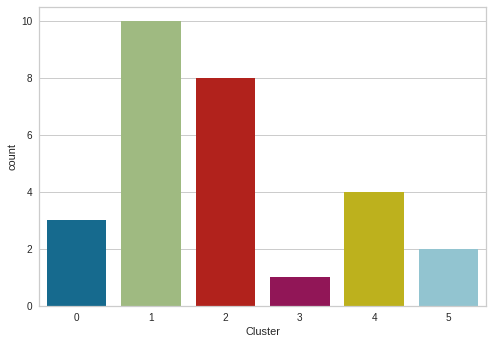

In [37]:
# Jumlah tiap klaster
sns.countplot(x=clus_pca_2_5['Cluster'])

In [38]:
clus_pca_2_5[['Kecamatan','Cluster']].sort_values(by=['Cluster','Kecamatan'])

,Kecamatan,Cluster
19,Padangan,0
22,Sugihwaras,0
23,Sukosewu,0
3,Bubulan,1
5,Gayam,1
6,Gondang,1
14,Malo,1
15,Margomulyo,1
16,Ngambon,1
20,Purwosari,1


Pengujian dengan menggunakan PCA 2 komponen utama dan KMeans++ dengan k=5 ditemukan bahwa produksi pertanian di Bojonegoro terkelompokkan sebagai berikut:
* Kelompok 1: Bojonegoro, Kasiman,	Padangan
* Kelompok 2: Bubulan, Gayam, Malo, Ngambon, Purwosari, Temayang, Trucuk
* Kelompok 3: Dander, Kedungadem, Sumberrejo
* Kelompok 4: Kanor, Kapas, Kepohbaru
* Kelompok 5: Balen, Baureno, Gondang, Kalitidu, Margomulyo, Ngasem, Ngraho, Sekar, Sugihwaras, Sukosewu, Tambakrejo
* Kelompok 6: Kedewan